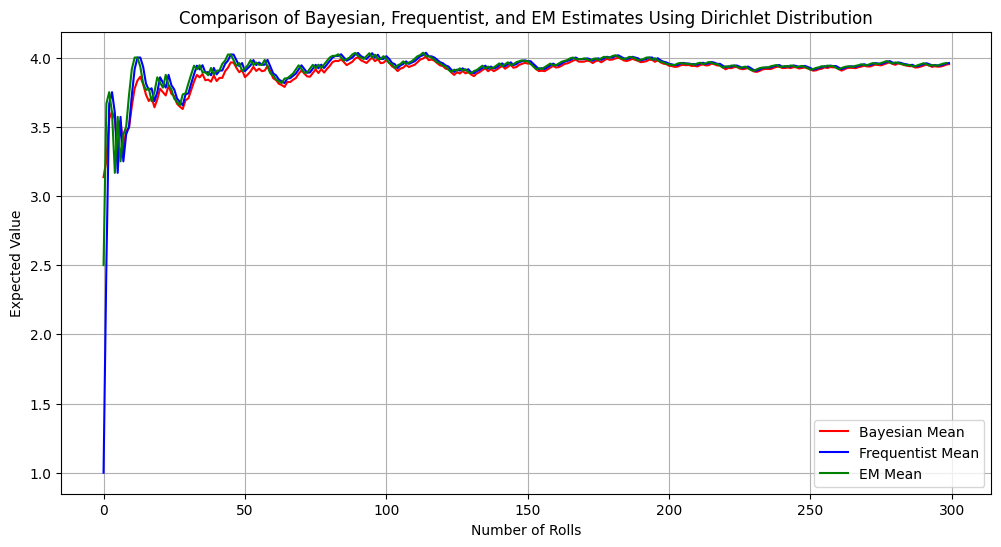

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

def bayesian_update(latest_roll, alpha_params):
    """
    Update the Bayesian probabilities using the Dirichlet distribution and calculate the expected value.
    
    Parameters:
    - latest_roll (int): The outcome of the latest dice roll.
    - alpha_params (np.array): Alpha parameters of the Dirichlet distribution, representing counts for each face.
    
    Returns:
    - float: The updated Bayesian expected value of the die roll.
    - np.array: Updated alpha parameters for the Dirichlet distribution.
    """
    # Update the count for the rolled face
    alpha_params[latest_roll - 1] += 1
    
    # Draw a large number of samples from the Dirichlet distribution to approximate the expected value
    posterior_samples = dirichlet.rvs(alpha_params, size=10000)
    expected_value = np.sum(posterior_samples * np.arange(1, 7), axis=1).mean()
    
    return expected_value, alpha_params

def frequentist_calculation(rolls):
    """
    Calculate the frequentist expected value based on observed rolls.
    
    Parameters:
    - rolls (np.array): Array containing the outcomes of the die rolls.
    
    Returns:
    - float: The frequentist expected value based on the mean of the rolls.
    """
    frequentist_mean = np.mean(rolls)
    return frequentist_mean

def em_update(rolls, probabilities):
    """
    Update parameters using the Expectation-Maximization algorithm to estimate probabilities of die faces.
    
    Parameters:
    - rolls (np.array): Array of observed rolls.
    - probabilities (np.array): Current estimated probabilities for each face.
    
    Returns:
    - float: New expected value based on updated probabilities.
    """
    counts = np.array([np.sum(rolls == i) for i in range(1, 7)])
    probabilities = (counts / counts.sum())
    expected_value = np.sum(probabilities * np.arange(1, 7))
    return expected_value, probabilities

# Define the true probabilities for the biased die
true_probabilities = np.array([1, 1, 1, 1, 1, 2]) / 7

# Initial alpha parameters for the Dirichlet distribution (uniform prior)
alpha_prior = np.ones(6)  # Start with equal count for all faces

# Simulate rolls
num_rolls = 300
rolls = np.random.choice([1, 2, 3, 4, 5, 6], size=num_rolls, p=true_probabilities)

frequentist_means = []
bayesian_means = []
em_means = []
alpha_params = alpha_prior.copy()
em_probabilities = np.ones(6) / 6  # Start with equal probabilities for EM

# Run simulation
for i in range(num_rolls):
    roll = rolls[i]
    
    # Update Bayesian probabilities and calculate the expected value
    bayesian_mean, alpha_params = bayesian_update(roll, alpha_params)
    
    # Calculate frequentist expected value
    frequentist_mean = frequentist_calculation(rolls[:i + 1])
    
    # Update and calculate using EM
    if i > 0:  # Ensure there's enough data to perform EM update
        em_mean, em_probabilities = em_update(rolls[:i + 1], em_probabilities)
        em_means.append(em_mean)
    
    # Store the results
    bayesian_means.append(bayesian_mean)
    frequentist_means.append(frequentist_mean)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(bayesian_means, label='Bayesian Mean', color='red')
plt.plot(frequentist_means, label='Frequentist Mean', color='blue')
plt.plot(em_means, label='EM Mean', color='green')
plt.xlabel('Number of Rolls')
plt.ylabel('Expected Value')
plt.title('Comparison of Bayesian, Frequentist, and EM Estimates Using Dirichlet Distribution')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet, norm

def bayesian_update(latest_roll, alpha_params):
    """
    Update the Bayesian probabilities using the Dirichlet distribution and calculate the expected value.
    
    Parameters:
    - latest_roll (int): The outcome of the latest dice roll.
    - alpha_params (np.array): Alpha parameters of the Dirichlet distribution, representing counts for each face.
    
    Returns:
    - float: The updated Bayesian expected value of the die roll.
    - np.array: Updated alpha parameters for the Dirichlet distribution.
    - float: Standard deviation of the expected value estimate.
    """
    # Update the count for the rolled face
    alpha_params[latest_roll - 1] += 1
    
    # Draw a large number of samples from the Dirichlet distribution to approximate the expected value
    posterior_samples = dirichlet.rvs(alpha_params, size=10000)
    expected_values = np.sum(posterior_samples * np.arange(1, 7), axis=1)
    expected_value = expected_values.mean()
    std_dev = expected_values.std()
    
    return expected_value, alpha_params, std_dev

# Initial alpha parameters for the Dirichlet distribution (uniform prior)
alpha_prior = np.ones(6)  # Start with equal count for all faces

# Simulate rolls
num_rolls = 40  # Reduced number of rolls
true_probabilities = np.array([1, 1, 1, 1, 1, 5]) / 10  # Biased die probabilities
rolls = np.random.choice([1, 2, 3, 4, 5, 6], size=num_rolls, p=true_probabilities)

alpha_params = alpha_prior.copy()

# Run simulation for 40 rolls
for roll in rolls:
    expected_value, alpha_params, std_dev = bayesian_update(roll, alpha_params)

# Calculate the 95% confidence interval
ci_lower = expected_value - 1.96 * std_dev
ci_upper = expected_value + 1.96 * std_dev

# Print the results
print("Estimated expected value:", round(expected_value, 2))
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(ci_lower, ci_upper))

# Generate probable keypad entries
keypad_entries = np.linspace(ci_lower, ci_upper, 20)
print("Probable Keypad Entries:", np.round(keypad_entries, 2))

Estimated expected value: 4.16
95% Confidence Interval: [3.64, 4.67]
Probable Keypad Entries: [3.64 3.69 3.75 3.8  3.86 3.91 3.96 4.02 4.07 4.13 4.18 4.24 4.29 4.35
 4.4  4.45 4.51 4.56 4.62 4.67]


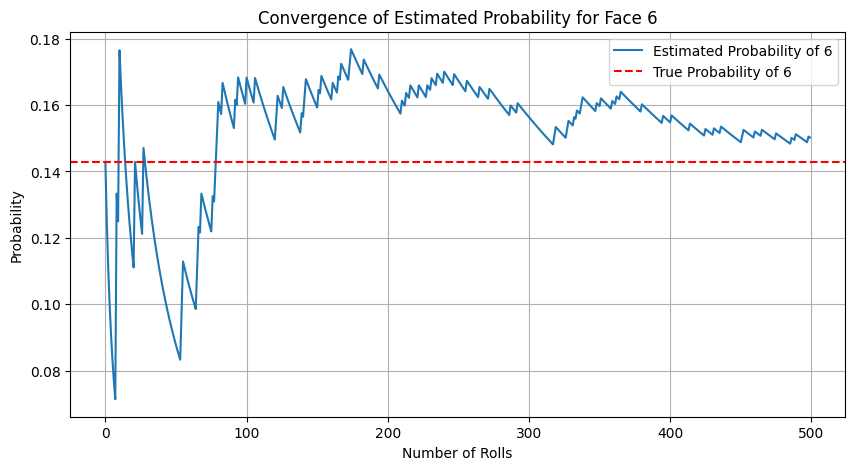

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

def simulate_dice_rolls(num_rolls, bias_prob):
    """ Simulate dice rolls with a given bias probability. """
    faces = np.arange(1, 7)
    rolls = np.random.choice(faces, size=num_rolls, p=bias_prob)
    return rolls

def bayesian_update(rolls, alpha_prior):
    """ Update the Dirichlet parameters based on observed rolls. """
    alpha_posterior = alpha_prior.copy()
    for face in rolls:
        alpha_posterior[face - 1] += 1
    return alpha_posterior

def calculate_probabilities(alpha_params):
    """ Calculate the mean probabilities from Dirichlet parameters. """
    total = sum(alpha_params)
    probabilities = [alpha / total for alpha in alpha_params]
    return probabilities

# Setup
num_rolls = 500
bias_prob = [1, 1, 1, 1, 2, 1]  # Biased towards rolling a '6'
bias_prob = np.array(bias_prob)/sum(bias_prob)
alpha_prior = np.ones(6)  # Uniform prior

# Simulation
rolls = simulate_dice_rolls(num_rolls, bias_prob)

# Bayesian Updating
alpha_posterior = alpha_prior
probabilities_over_time = []

for i in range(num_rolls):
    alpha_posterior = bayesian_update(rolls[:i + 1], alpha_prior)
    probabilities = calculate_probabilities(alpha_posterior)
    probabilities_over_time.append(probabilities[-1])  # Tracking the probability of '6'

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(probabilities_over_time, label='Estimated Probability of 6')
plt.axhline(y=bias_prob[-1], color='r', linestyle='--', label='True Probability of 6')
plt.xlabel('Number of Rolls')
plt.ylabel('Probability')
plt.title('Convergence of Estimated Probability for Face 6')
plt.legend()
plt.grid(True)
plt.show()

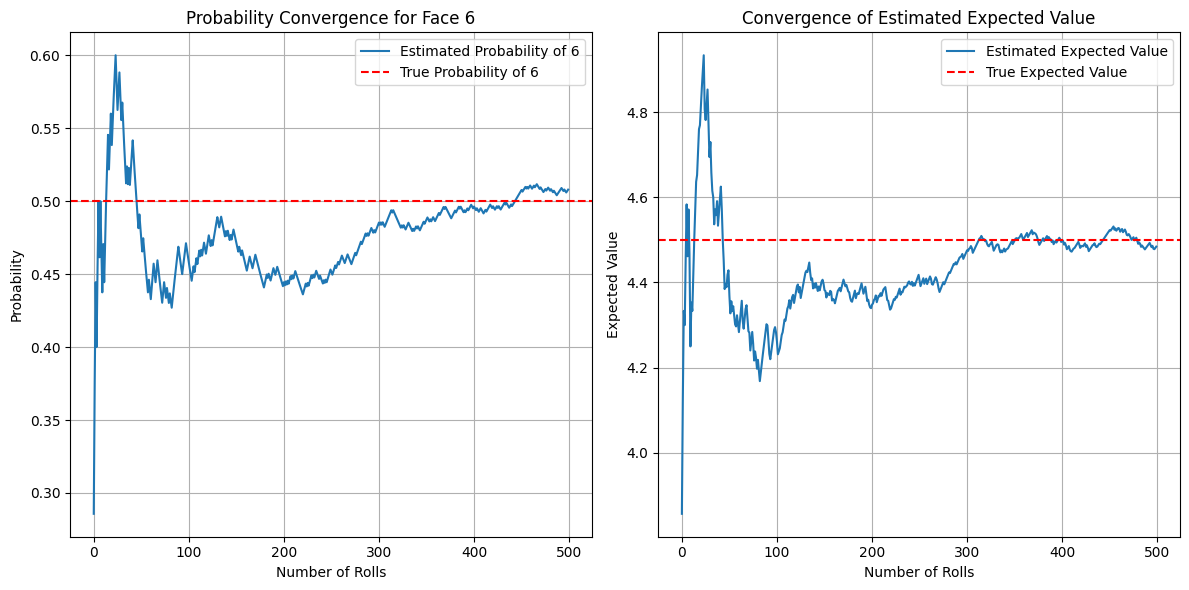

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

def simulate_dice_rolls(num_rolls, bias_prob):
    """ Simulate dice rolls with a given bias probability. """
    faces = np.arange(1, 7)
    rolls = np.random.choice(faces, size=num_rolls, p=bias_prob)
    return rolls

def bayesian_update(rolls, alpha_prior):
    """ Update the Dirichlet parameters based on observed rolls. """
    alpha_posterior = alpha_prior.copy()
    for face in rolls:
        alpha_posterior[face - 1] += 1
    return alpha_posterior

def calculate_probabilities(alpha_params):
    """ Calculate the mean probabilities from Dirichlet parameters. """
    total = sum(alpha_params)
    probabilities = [alpha / total for alpha in alpha_params]
    return probabilities

def calculate_expected_value(probabilities):
    """ Calculate the expected value from probabilities. """
    faces = np.arange(1, 7)
    expected_value = np.sum(faces * probabilities)
    return expected_value

# Setup
num_rolls = 500
bias_prob = [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]  # Biased towards rolling a '6'
alpha_prior = np.ones(6)  # Uniform prior

# Simulation
rolls = simulate_dice_rolls(num_rolls, bias_prob)

# Bayesian Updating
alpha_posterior = alpha_prior
probabilities_over_time = []
expected_values_over_time = []

for i in range(num_rolls):
    alpha_posterior = bayesian_update(rolls[:i + 1], alpha_prior)
    probabilities = calculate_probabilities(alpha_posterior)
    expected_value = calculate_expected_value(probabilities)
    probabilities_over_time.append(probabilities[-1])  # Tracking the probability of '6'
    expected_values_over_time.append(expected_value)  # Tracking the expected value

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(probabilities_over_time, label='Estimated Probability of 6')
plt.axhline(y=bias_prob[-1], color='r', linestyle='--', label='True Probability of 6')
plt.xlabel('Number of Rolls')
plt.ylabel('Probability')
plt.title('Probability Convergence for Face 6')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(expected_values_over_time, label='Estimated Expected Value')
plt.axhline(y=np.sum(np.arange(1, 7) * bias_prob), color='r', linestyle='--', label='True Expected Value')
plt.xlabel('Number of Rolls')
plt.ylabel('Expected Value')
plt.title('Convergence of Estimated Expected Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

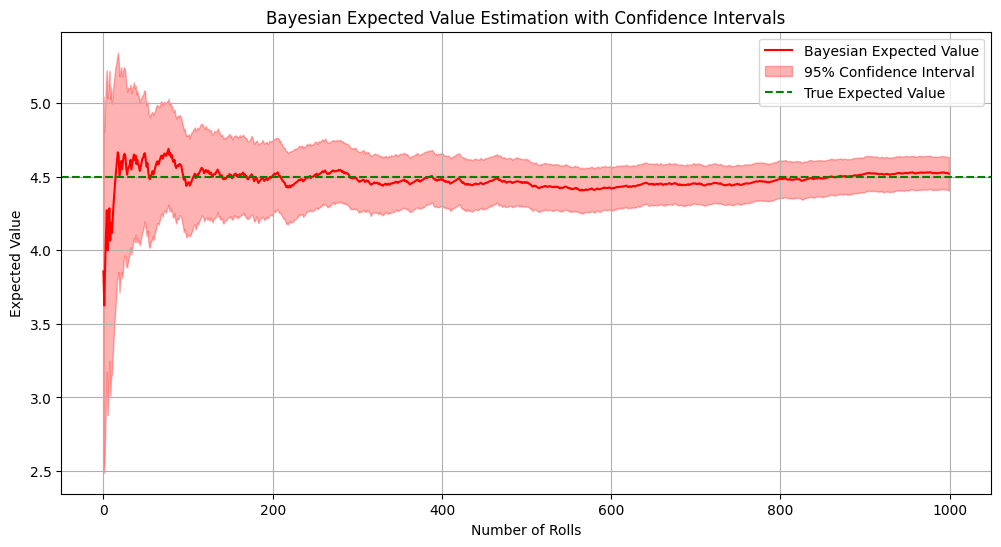

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

def bayesian_update(latest_roll, alpha_params):
    """
    Update the Bayesian probabilities using the Dirichlet distribution and calculate the expected value.
    
    Parameters:
    - latest_roll (int): The outcome of the latest dice roll.
    - alpha_params (np.array): Alpha parameters of the Dirichlet distribution, representing counts for each face.
    
    Returns:
    - float: The updated Bayesian expected value of the die roll.
    - np.array: Updated alpha parameters for the Dirichlet distribution.
    """
    # Update the count for the rolled face
    alpha_params[latest_roll - 1] += 1
    
    # Calculate the mean probabilities and expected value
    mean_probabilities = alpha_params / np.sum(alpha_params)
    expected_value = np.sum(mean_probabilities * np.arange(1, 7))
    
    return expected_value, alpha_params

def calculate_confidence_intervals(alpha_params):
    """
    Calculate the 95% confidence intervals for the expected value from the Dirichlet distribution.
    
    Parameters:
    - alpha_params (np.array): Alpha parameters of the Dirichlet distribution.
    
    Returns:
    - tuple: Lower and upper bounds of the 95% confidence interval for the expected value.
    """
    samples = dirichlet.rvs(alpha_params, size=10000)
    expected_values = np.dot(samples, np.arange(1, 7))
    lower_bound = np.percentile(expected_values, 2.5)
    upper_bound = np.percentile(expected_values, 97.5)
    
    return lower_bound, upper_bound

# Simulate dice rolls
true_probabilities = np.array([1, 1, 1, 1, 1, 5]) / 10
num_rolls = 1000
rolls = np.random.choice(np.arange(1, 7), p=true_probabilities, size=num_rolls)

# Initial alpha parameters for the Dirichlet distribution (uniform prior)
alpha_prior = np.ones(6)  

bayesian_means = []
conf_intervals = []

for roll in rolls:
    bayesian_mean, alpha_prior = bayesian_update(roll, alpha_prior)
    bayesian_means.append(bayesian_mean)
    conf_interval = calculate_confidence_intervals(alpha_prior)
    conf_intervals.append(conf_interval)

# Plotting the results with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(bayesian_means, label='Bayesian Expected Value', color='red')
plt.fill_between(range(num_rolls), [ci[0] for ci in conf_intervals], [ci[1] for ci in conf_intervals], color='red', alpha=0.3, label='95% Confidence Interval')
plt.axhline(y=np.sum(np.arange(1, 7) * true_probabilities), color='green', linestyle='--', label='True Expected Value')
plt.xlabel('Number of Rolls')
plt.ylabel('Expected Value')
plt.title('Bayesian Expected Value Estimation with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()